###**URBAN MOBILITY MEETS AI: A MACHINE LEARNING APPROACH TO CAPITAL BIKESHARE**


###Introduction:
Bike-sharing systems are a modern evolution of traditional bike rental services,, wherein the whole procedure, encompassing membership, bike rental, and return, has been mechanized. These systems enable users to conveniently lease a bicycle at one station and return it to a different station via shuttle services. Today, there exist more than 500 bike-sharing initiatives worldwide, encompassing a fleet of over 500,000 bicycles. The increasing prevalence of these systems can be attributed basically to their substantial contributions in addressing traffic, environmental, and public health issues.

Furthermore, apart from their pragmatic uses, the data produced by bike-sharing systems offers significant prospects for scholarship. In contrast to other modes of public transportation like buses or subways, these systems offer accurate documentation of journey length, origin and destination points. This technology converts bike-sharing networks into a virtual sensor system, allowing for the observation of urban mobility patterns. Hence, it is feasible to identify significant urban occurrences by examining these observational trends.



###Overview of the dataset:
The dataset used for this analysis was acquired from the system data of Capital Bikeshare (link: https://capitalbikeshare.com/system-data). The dataset comprises records of bicycle journeys undertaken via the Capital Bikeshare system, including a range of bike models and ride properties such as origin and destination points, ride lengths, and user categories.


In [46]:
#importing necessary libraries
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
from io import BytesIO
import warnings


In [2]:
# loading the dataset
zip_file_path = '/content/202406-capitalbikeshare-tripdata.zip'
extract_dir = '/content/extracted_data/'
output_dir = './data/'
output_file_path = os.path.join(output_dir, '202205-capitalbikeshare-tripdata.parquet')

#  Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

#  Load the dataset into a pandas DataFrame
for file_name in os.listdir(extract_dir):
    if file_name.endswith('.csv'):
        csv_file_path = os.path.join(extract_dir, file_name)
        df = pd.read_csv(csv_file_path)
        break
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.03023,38.896104,-77.049882,member
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.03023,38.878433,-77.030230,casual
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.08095,38.896553,-77.067140,member
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.99530,38.875010,-77.002400,member
4,ED7927DEC2453CA7,classic_bike,2024-06-15 13:33:26.602,2024-06-16 14:33:22.929,Roosevelt Island,31062.0,NaN,NaN,38.896553,-77.06714,38.870000,-77.090000,casual


In [4]:
df.shape

(584402, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584402 entries, 0 to 584401
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             584402 non-null  object 
 1   rideable_type       584402 non-null  object 
 2   started_at          584402 non-null  object 
 3   ended_at            584402 non-null  object 
 4   start_station_name  486806 non-null  object 
 5   start_station_id    486806 non-null  float64
 6   end_station_name    483068 non-null  object 
 7   end_station_id      482969 non-null  float64
 8   start_lat           584402 non-null  float64
 9   start_lng           584402 non-null  float64
 10  end_lat             583844 non-null  float64
 11  end_lng             583844 non-null  float64
 12  member_casual       584402 non-null  object 
dtypes: float64(6), object(7)
memory usage: 58.0+ MB


## Data Cleaning:
Data preparation is an essential step in every data analysis pipeline. Data preprocessing is the process of cleansing, formatting, and arranging unprocessed data to render it appropriate for analysis. The purpose of this step is to verify the correctness and avoid any inconsistencies in the dataset, such as missing values, duplicate instances, or incorrect entries. Commonly employed techniques include handling missing data, transformation of data types, and normalization of values.


In [6]:
#Conver started_at & Ended_at to date time format
df.started_at = pd.to_datetime(df.started_at)
df.ended_at = pd.to_datetime(df.ended_at)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.03023,38.896104,-77.049882,member
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.03023,38.878433,-77.030230,casual
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.08095,38.896553,-77.067140,member
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.99530,38.875010,-77.002400,member
4,ED7927DEC2453CA7,classic_bike,2024-06-15 13:33:26.602,2024-06-16 14:33:22.929,Roosevelt Island,31062.0,NaN,NaN,38.896553,-77.06714,38.870000,-77.090000,casual


In [7]:
#add additionl column (Duration)
df["duration"] = df.ended_at - df.started_at
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.03023,38.896104,-77.049882,member,35.470283
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.03023,38.878433,-77.030230,casual,264.972000
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.08095,38.896553,-77.067140,member,8.962617
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.99530,38.875010,-77.002400,member,25.316683
4,ED7927DEC2453CA7,classic_bike,2024-06-15 13:33:26.602,2024-06-16 14:33:22.929,Roosevelt Island,31062.0,NaN,NaN,38.896553,-77.06714,38.870000,-77.090000,casual,1499.938783


In [8]:
# Add columns for the day, month, and hour of the ride
df['start_day'] = df['started_at'].dt.day
df['start_month'] = df['started_at'].dt.month
df['start_hour'] = df['started_at'].dt.hour


In [9]:
((df.duration >= 1) & (df.duration <= 60)).sum()

556703

In [10]:
# Save the DataFrame as a Parquet file
df.to_parquet(output_file_path, engine="pyarrow")

print(f"File successfully saved to {output_file_path}")


File successfully saved to ./data/202205-capitalbikeshare-tripdata.parquet


In [11]:
# Define the path to the Parquet file
parquet_file_path = './data/202205-capitalbikeshare-tripdata.parquet'

# Read the Parquet file into a pandas DataFrame
df = pd.read_parquet(parquet_file_path, engine='pyarrow')

df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_day,start_month,start_hour
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.03023,38.896104,-77.049882,member,35.470283,16,6,9
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.03023,38.878433,-77.030230,casual,264.972000,9,6,8
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.08095,38.896553,-77.067140,member,8.962617,16,6,10
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.99530,38.875010,-77.002400,member,25.316683,8,6,11
4,ED7927DEC2453CA7,classic_bike,2024-06-15 13:33:26.602,2024-06-16 14:33:22.929,Roosevelt Island,31062.0,None,NaN,38.896553,-77.06714,38.870000,-77.090000,casual,1499.938783,15,6,13


In [12]:
# Find columns with missing values
missing_values_sum = df.isna().sum()

# Filter and print  columns with missing values
missing_columns = missing_values_sum[missing_values_sum > 0]
missing_columns


,0
start_station_name,97596
start_station_id,97596
end_station_name,101334
end_station_id,101433
end_lat,558
end_lng,558


In [13]:
#percentage of missing values in each column
missing_values_pct = (df.isna().sum() / len(df)) * 100
missing_values_pct


,0
ride_id,0.000000
rideable_type,0.000000
started_at,0.000000
ended_at,0.000000
start_station_name,16.700148
start_station_id,16.700148
end_station_name,17.339776
end_station_id,17.356717
start_lat,0.000000
start_lng,0.000000


In [14]:
df.dropna(inplace=True)
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_day,start_month,start_hour
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.030230,38.896104,-77.049882,member,35.470283,16,6,9
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.030230,38.878433,-77.030230,casual,264.972000,9,6,8
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.080950,38.896553,-77.067140,member,8.962617,16,6,10
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.995300,38.875010,-77.002400,member,25.316683,8,6,11
9,498ADC8872CD17F7,electric_bike,2024-06-17 08:13:00.021,2024-06-17 08:17:00.615,4th & College St NW,31138.0,Georgia Ave & Morton St NW,31419.0,38.921169,-77.018178,38.932128,-77.023500,member,4.009900,17,6,8


In [15]:
df.shape

(443089, 17)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 443089 entries, 0 to 584393
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             443089 non-null  object        
 1   rideable_type       443089 non-null  object        
 2   started_at          443089 non-null  datetime64[ns]
 3   ended_at            443089 non-null  datetime64[ns]
 4   start_station_name  443089 non-null  object        
 5   start_station_id    443089 non-null  float64       
 6   end_station_name    443089 non-null  object        
 7   end_station_id      443089 non-null  float64       
 8   start_lat           443089 non-null  float64       
 9   start_lng           443089 non-null  float64       
 10  end_lat             443089 non-null  float64       
 11  end_lng             443089 non-null  float64       
 12  member_casual       443089 non-null  object        
 13  duration            443089 non-nul

In [17]:
#Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'duration' column
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the upper and lower bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Calculate the median of the 'duration' column
median_duration = df['duration'].median()

#Impute outliers (replace values outside the bounds with the median)
df['duration'] = df['duration'].apply(lambda x: median_duration if x < lower_bound or x > upper_bound else x)

# Verify if the outliers are imputed
print(f"Dataset size remains the same: {df.shape[0]}")


Dataset size remains the same: 443089


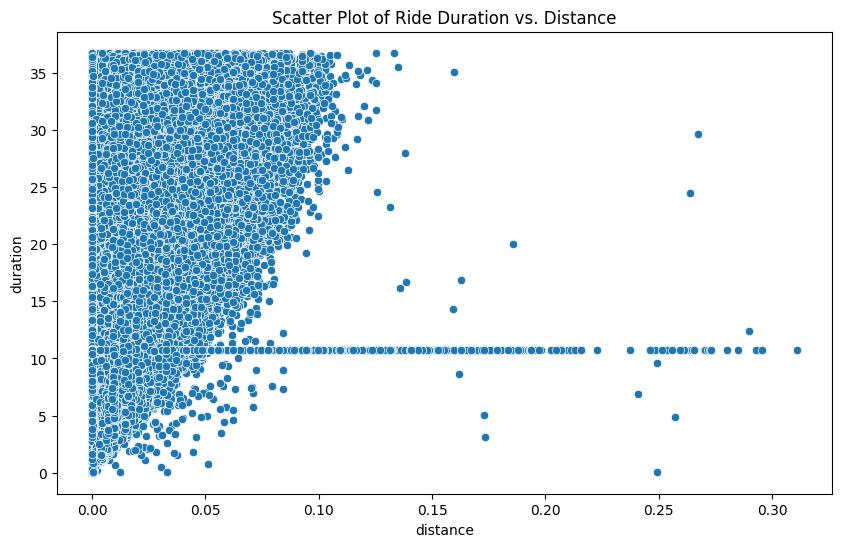

In [18]:
# Calculate ride distance (Euclidean distance) between start and end points
df['distance'] = np.sqrt((df['start_lat'] - df['end_lat'])**2 + (df['start_lng'] - df['end_lng'])**2)

# Scatter plot of duration vs. distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='duration', data=df)
plt.title('Scatter Plot of Ride Duration vs. Distance')
plt.show()


In [19]:
# Filter rides where the distance is small but duration is large
suspicious_rides = df[(df['distance'] < 0.10) & (df['duration'] > 15)]
suspicious_rides


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_day,start_month,start_hour,distance
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.030230,38.896104,-77.049882,member,35.470283,16,6,9,0.026428
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.995300,38.875010,-77.002400,member,25.316683,8,6,11,0.008244
10,47AD96D56DD5D875,electric_bike,2024-06-28 19:23:33.107,2024-06-28 19:47:26.300,Roosevelt Island,31062.0,Langston Blvd & N Woodstock St,31900.0,38.896568,-77.067199,38.898301,-77.118009,member,23.886550,28,6,19,0.050839
20,A569FCEE1630C97A,classic_bike,2024-06-27 22:16:22.517,2024-06-27 22:35:15.839,9th & N St NW,31336.0,11th & O St NW,31286.0,38.906622,-77.023885,38.908431,-77.027088,member,18.888700,27,6,22,0.003679
21,B6A3C8A2150EAB13,electric_bike,2024-06-08 01:39:27.126,2024-06-08 01:56:59.994,8th & Eye St SE / Barracks Row,31608.0,New Hampshire Ave & 24th St NW,31275.0,38.879270,-76.995293,38.901755,-77.051084,member,17.547800,8,6,1,0.060152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584251,E16833A3B9E8E2A7,electric_bike,2024-06-13 19:20:38.974,2024-06-13 19:35:59.201,Langston Blvd & N Woodstock St,31900.0,N Pershing Dr & N Quebec St,31973.0,38.898370,-77.117989,38.874248,-77.104784,casual,15.337117,13,6,19,0.027500
584301,D93EED2563C596EE,electric_bike,2024-06-08 14:24:33.814,2024-06-08 14:48:02.376,17th & K St NW,31213.0,14th & Belmont St NW,31119.0,38.902737,-77.038376,38.921074,-77.031887,member,23.476033,8,6,14,0.019451
584372,2A00BD12A1F35CEF,classic_bike,2024-06-30 21:25:53.237,2024-06-30 21:48:47.879,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,14th & Belmont St NW,31119.0,38.890539,-77.049383,38.921074,-77.031887,member,22.910700,30,6,21,0.035192
584384,302DAEDC3B4410A8,electric_bike,2024-06-22 11:21:07.024,2024-06-22 11:45:55.492,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,14th & Belmont St NW,31119.0,38.890585,-77.049361,38.921074,-77.031887,casual,24.807800,22,6,11,0.035141


In [20]:
# Calculate the median of the 'duration' column for imputation
distance_threshold = 0.10  # Set a small threshold for short distances
duration_threshold = 15
median_duration = df['duration'].median()

# Impute the outliers where the distance is small but duration is large
df['duration'] = df.apply(
    lambda x: median_duration if (x['distance'] < distance_threshold and x['duration'] > duration_threshold) else x['duration'], axis=1
)

# Check if the dataset now has fewer extreme outliers
print(f"Dataset size remains the same: {df.shape[0]}")



Dataset size remains the same: 443089


In [21]:
# Filter rides where the distance is small but duration is large
suspicious_rides = df[(df['distance'] < 0.05) & (df['duration'] > 15)]
print(suspicious_rides)

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, duration, start_day, start_month, start_hour, distance]
Index: []


In [22]:
# Remove rows with invalid latitude and longitude
df = df[(df['start_lat'].between(-90, 90)) & (df['start_lng'].between(-180, 180))]
df = df[(df['end_lat'].between(-90, 90)) & (df['end_lng'].between(-180, 180))]
df.head()
df.shape

(443089, 18)

In [23]:
# Remove rows where the ride end time is before the start time
df = df[df['ended_at'] > df['started_at']]
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_day,start_month,start_hour,distance
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.030230,38.896104,-77.049882,member,10.739117,16,6,9,0.026428
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.030230,38.878433,-77.030230,casual,10.739117,9,6,8,0.000000
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.080950,38.896553,-77.067140,member,8.962617,16,6,10,0.015062
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.995300,38.875010,-77.002400,member,10.739117,8,6,11,0.008244
9,498ADC8872CD17F7,electric_bike,2024-06-17 08:13:00.021,2024-06-17 08:17:00.615,4th & College St NW,31138.0,Georgia Ave & Morton St NW,31419.0,38.921169,-77.018178,38.932128,-77.023500,member,4.009900,17,6,8,0.012183


###Exploratory Data Analysis:
Exploratory Data Analysis (EDA) is the systematic procedure of visually representing and summarizing a dataset in order to reveal patterns, trends, and correlations among variables. Exploratory Data Analysis (EDA) is crucial for comprehending the dataset prior to implementing more sophisticated statistical models or machine learning algorithms. Standard methods employed in exploratory data analysis (EDA) encompass histograms, scatter plots, box plots, and correlation heatmaps. A histogram allows for the visual representation of the distribution of ride durations, whereas scatter plots enable the identification of correlations between ride distance and duration. Regarding bike-sharing data, exploratory data analysis (EDA) can uncover periods of high ride demand, well-used stations, or the favored bike models (classic vs. electric), enabling analysts to get first understanding of user behavior.


In [24]:
#To check value counts in Rideable_type
df["rideable_type"].value_counts()

,count
rideable_type,
classic_bike,296902
electric_bike,146187


<ipython-input-25-e9f3301b8598>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rideable_type', palette=colors)


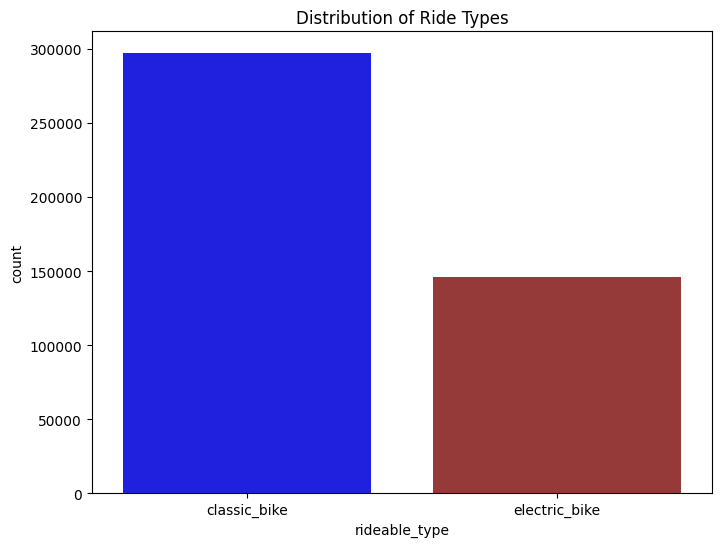

In [25]:
#Histogram of Distribution of Ride Types
colors = ["blue" ,  "brown"]

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='rideable_type', palette=colors)
plt.title('Distribution of Ride Types')
plt.show()




**Observatios:**The bar graph depicts the distribution of rideable types, demonstrating a far greater number of classic bikes compared to electric bikes. The system is primarily dominated by classic bikes, which account for over 300,000 rides, while electric bikes attract less than 150,000 rides. These findings indicate that customers exhibit a more significant preference towards classic bicycles, perhaps influenced by aspects such as availability, price, or ease of access.

In [26]:
#calculate unique values in Member_ cASUAL column
df["member_casual"].nunique()
df["member_casual"].unique()
df["member_casual"].value_counts()

,count
member_casual,
member,267637
casual,175452


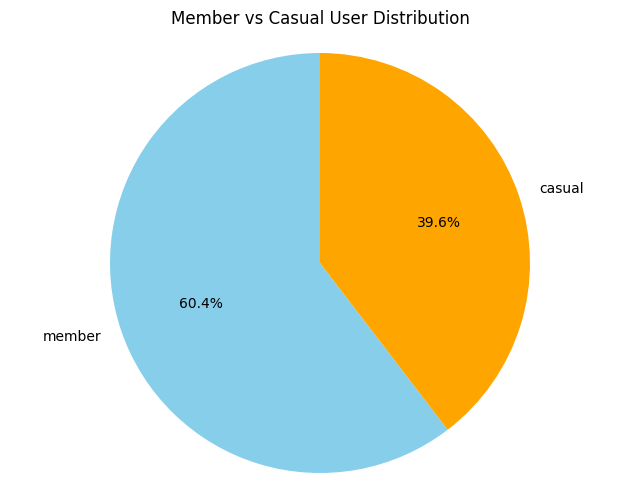

In [27]:

#pie chart of Member vs Casual User Distribution
member_casual_counts = df['member_casual'].value_counts()

labels = member_casual_counts.index
sizes = member_casual_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])

plt.axis('equal')
plt.title('Member vs Casual User Distribution')
plt.show()


**observations:**This pie chart illustrates the allocation of the bike-sharing system between its members and casual users. The proportion of total rides associated with members is 60.4%, whereas casual users make up 39.6%. This data suggests that a significant proportion of the system's users are individuals who have been members for an extended period, indicating a consistent level of involvement and loyalty to the company. Nevertheless, the substantial subset of casual users emphasizes the system's ease of use and attractiveness to individuals who are not members, maybe influenced by tourists or occasional riders. The analysis of this distribution is crucial for comprehending user behavior and establishing marketing or service strategies targeted towards both groups.

In [28]:
df["start_end_station_combination"] = df["start_station_name"] + " - " + df["end_station_name"]
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,start_day,start_month,start_hour,distance,start_end_station_combination
0,3A75192373009DCA,classic_bike,2024-06-16 09:21:19.510,2024-06-16 09:56:47.727,Hains Point/Buckeye & Ohio Dr SW,31273.0,23rd & E St NW,31260.0,38.878433,-77.030230,38.896104,-77.049882,member,10.739117,16,6,9,0.026428,Hains Point/Buckeye & Ohio Dr SW - 23rd & E St...
1,D399B82421A5D0E1,classic_bike,2024-06-09 08:49:48.266,2024-06-09 13:14:46.586,Hains Point/Buckeye & Ohio Dr SW,31273.0,Hains Point/Buckeye & Ohio Dr SW,31273.0,38.878433,-77.030230,38.878433,-77.030230,casual,10.739117,9,6,8,0.000000,Hains Point/Buckeye & Ohio Dr SW - Hains Point...
2,42FEF5C9E699496B,classic_bike,2024-06-16 10:46:28.432,2024-06-16 10:55:26.189,15th St & N Scott St,31031.0,Roosevelt Island,31062.0,38.890540,-77.080950,38.896553,-77.067140,member,8.962617,16,6,10,0.015062,15th St & N Scott St - Roosevelt Island
3,5B6E15B7256ED377,classic_bike,2024-06-08 11:54:19.244,2024-06-08 12:19:38.245,8th & Eye St SE / Barracks Row,31608.0,3rd & Tingey St SE,31634.0,38.879200,-76.995300,38.875010,-77.002400,member,10.739117,8,6,11,0.008244,8th & Eye St SE / Barracks Row - 3rd & Tingey ...
9,498ADC8872CD17F7,electric_bike,2024-06-17 08:13:00.021,2024-06-17 08:17:00.615,4th & College St NW,31138.0,Georgia Ave & Morton St NW,31419.0,38.921169,-77.018178,38.932128,-77.023500,member,4.009900,17,6,8,0.012183,4th & College St NW - Georgia Ave & Morton St NW


In [29]:
#calulate mean_duration_by_start_end_station
mean_duration_by_start_end_station = (
    df.groupby("start_end_station_combination")["duration"]
    .mean()
    .sort_values(ascending=False)
)
mean_duration_by_start_end_station.head(10)

,duration
start_end_station_combination,
Dorr Ave & Prosperity Ave - Columbia Pike & S George Mason Dr,36.694467
Marion Barry Ave & Naylor Rd SE - 9th & Ingraham St NW,36.556183
N Pitt St & Montgomery St - 18th St & Wyoming Ave NW,36.541983
Langston Blvd & N Adams St - Alabama & MLK Ave SE,36.175333
Eden Center - Crystal Dr & 27th St S,36.018167
15th & L St NW - Duke St & John Carlyle St,35.789967
10th St & L'Enfant Plaza SW - Fenton St & Gist Ave,35.762567
Potomac Ave & Main Line Blvd - Connecticut Ave & Ordway St NW / Cleveland Park Metro,35.706733
Langston Blvd & N Cleveland St - 34th St & Minnesota Ave SE,35.486967


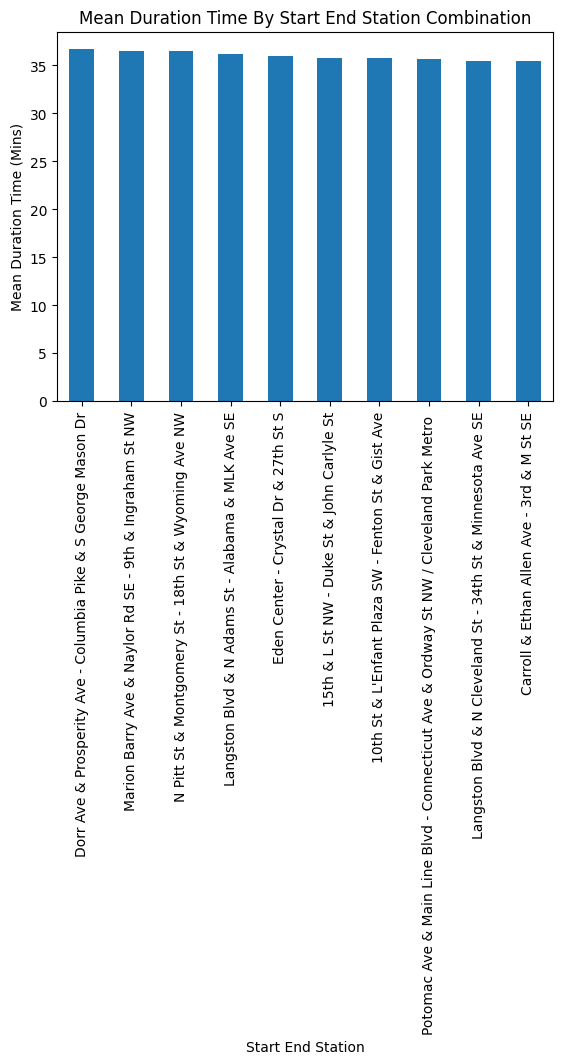

In [30]:
#Mean Duration Time By Start End Station Combination (top 10 locations)
mean_duration_by_start_end_station.head(10).plot(
    kind="bar",
    xlabel="Start End Station",
    ylabel="Mean Duration Time (Mins)",
    title="Mean Duration Time By Start End Station Combination"
);

**Obervations:**The bar graph shows the average duration time (in minutes) for different combinations of origin and destination stations in the bike-sharing system. Each bar corresponds to the mean duration of journeys between particular pairs of stations.

The chart reveals that the majority of the station combinations exhibit a comparable average duration, around 35 minutes. The observed consistency among different routes implies that the majority of journeys, irrespective of the starting and ending stations, require approximately the same duration to be completed.

This information is of significance to system planners, as it offers valuable insights into the average durations of trips undertaken in various locations. These findings can assist in the management of bicycle availability and the allocation of station resources to guarantee effective service, particularly during periods of high demand or on highly popular routes.



<ipython-input-31-0a33374c4359>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_month', ax=axes[0], palette='Set2')  # You can change the palette name
<ipython-input-31-0a33374c4359>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_day', ax=axes[1], palette='Set3')  # You can change the palette name


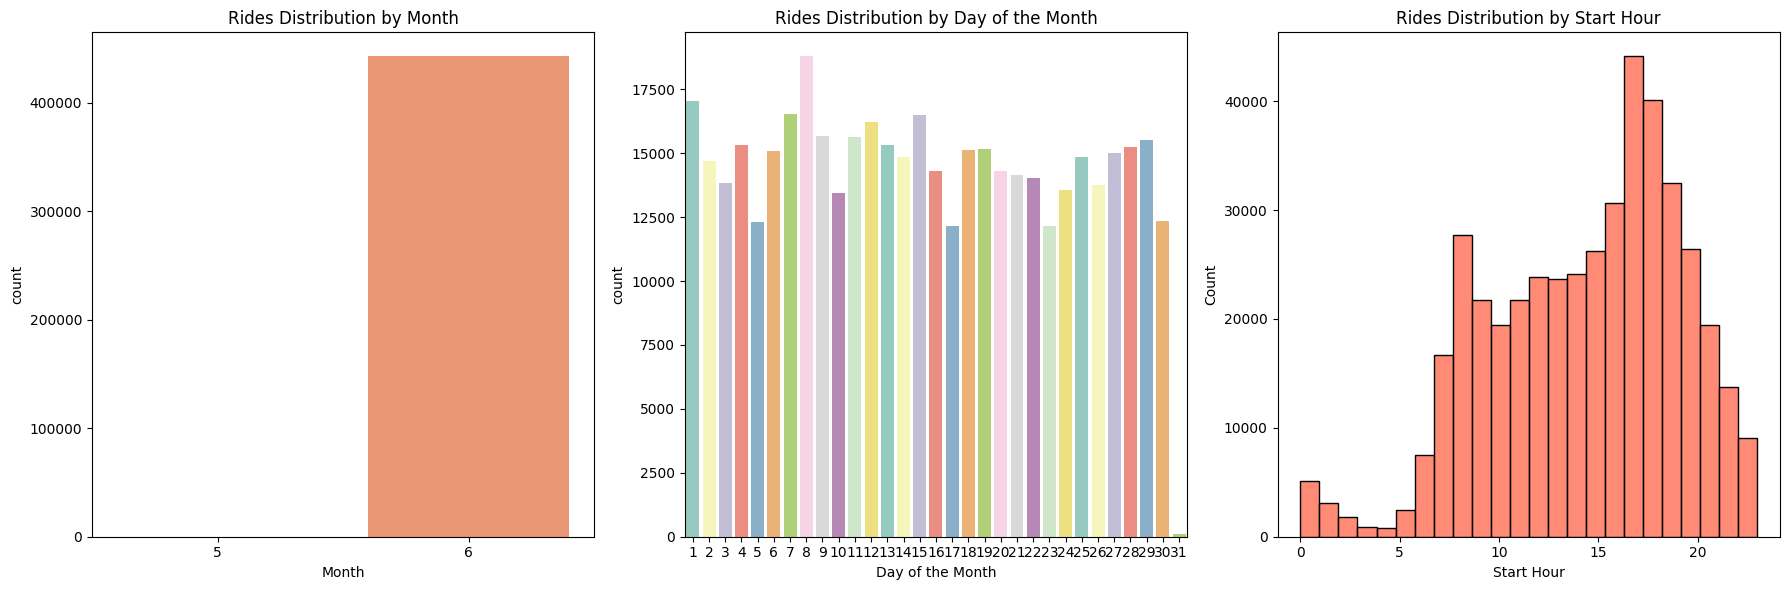

In [31]:
# Create a plot with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Rides Distribution by Month
sns.countplot(data=df, x='start_month', ax=axes[0], palette='Set2')
axes[0].set_title('Rides Distribution by Month')
axes[0].set_xlabel('Month')

# Plot 2: Rides Distribution by Day of the Month
sns.countplot(data=df, x='start_day', ax=axes[1], palette='Set3')
axes[1].set_title('Rides Distribution by Day of the Month')
axes[1].set_xlabel('Day of the Month')

# Plot 3: Rides Distribution by Start Hour (custom color)
sns.histplot(df['start_hour'], bins=24, kde=False, ax=axes[2], color='#FF6347')
axes[2].set_title('Rides Distribution by Start Hour')
axes[2].set_xlabel('Start Hour')


plt.tight_layout()

plt.show()


**Observations:** This set of bar graphs illustrates the distribution of bicycle rides according to three distinct time intervals: month, day of the month, and start hour.

**1. Monthly Ride Distribution:** The plot shows that rides are recorded only in the month of June (6th month). This suggests that the dataset focuses on a specific time period, likely a month-long window, with a high volume of rides exceeding 400,000.



**2. Rides Distribution by Day of the Month:** The second graph presents a summary of the distribution of rides based on the various days in June. The distribution of rides is fairly uniform over the month, although certain days (such as the 10th and 20th) have greater ride volumes, suggesting possible days of elevated demand.



3. Rides Distribution by Start Hour: The third graph displays the distribution of rides according to the time at which they begin each day. The ride times reach their highest point between 15:00 and 18:00 (3 PM to 6 PM), suggesting a significant demand in the late afternoon, particularly from commuters heading home. An additional, less prominent peak occurs at approximately 8:00 AM, which corresponds to the morning commute times.


The provided insights are of great value in comprehending the daily and hourly ride patterns, hence facilitating the optimization of bike availability during peak hours and the identification of the busiest days within a month.



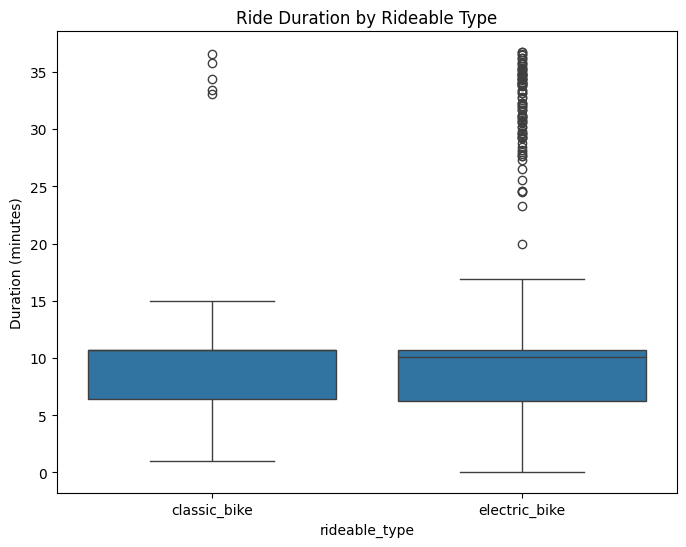

In [32]:
#Boxplot of Ride Duration by Rideable Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='rideable_type', y='duration')
plt.title('Ride Duration by Rideable Type')
plt.ylabel('Duration (minutes)')
plt.show()


Observations:This box plot illustrates the ride duration (in minutes) for both traditional bicycles and electric bicycles.

The median ride duration for both classic and electric bikes is approximately 10 minutes, suggesting that the majority of users successfully complete their trips within an equivalent period, irrespective of the type of bike.

The interquartile range (IQR) for both bike types exhibits an identical pattern, indicating a uniform range of durations for most rides.

In contrast, electric bikes exhibit a higher number of outliers, as evidenced by many rides exceeding 20 minutes and some surpassing 35 minutes. These findings indicate that electric bike users have a tendency to embark on lengthier journeys in comparison to traditional bike users. This could be attributed to the convenience of riding electric bikes over extended distances or across more demanding landscapes.



In general, the graph indicates that although the majority of trips are brief, electric bikes exhibit greater degree of variation in ride length, perhaps indicating distinct usage patterns.



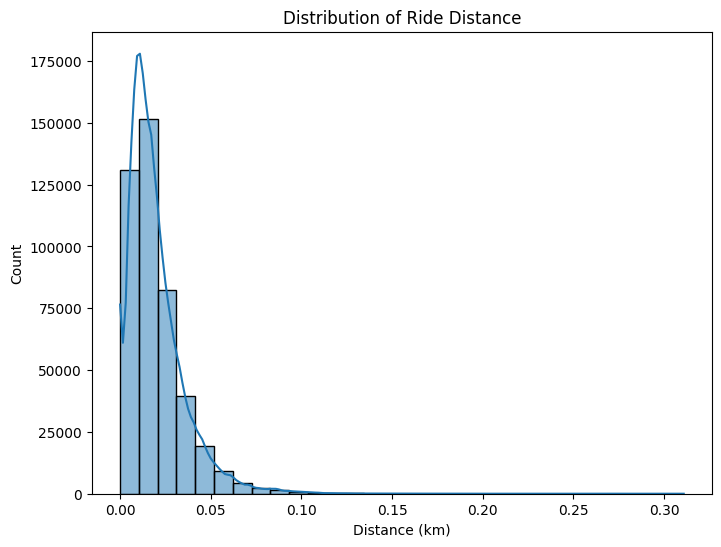

In [33]:
#Histogram to show Distribution of Ride Distance
plt.figure(figsize=(8, 6))
sns.histplot(df['distance'], bins=30, kde=True)
plt.title('Distribution of Ride Distance')
plt.xlabel('Distance (km)')
plt.show()


**Observations:**The histogram shown displays the distribution of ride distances (measured in kilometers) among bike-sharing users.
The plot exhibits a right-skewness, suggesting that the bulk of rides are conducted over short distances, with the majority of trips falling within the range of 0.00 km to 0.05 km.
The frequency of rides steeply declines as the distance increases. The majority of rides do not exceed a distance of 0.1 km, and the extreme of the distribution stretches up to approximately 0.30 km.
The significant decline in demand after 0.05 km indicates that the majority of users participate in brief journeys, which corresponds to the common use of bike-sharing systems for fast commutes or short vacations.
An analysis of this distribution can facilitate the comprehension of ride patterns and the optimization of bike positioning or station density to accommodate users who travel short distances.

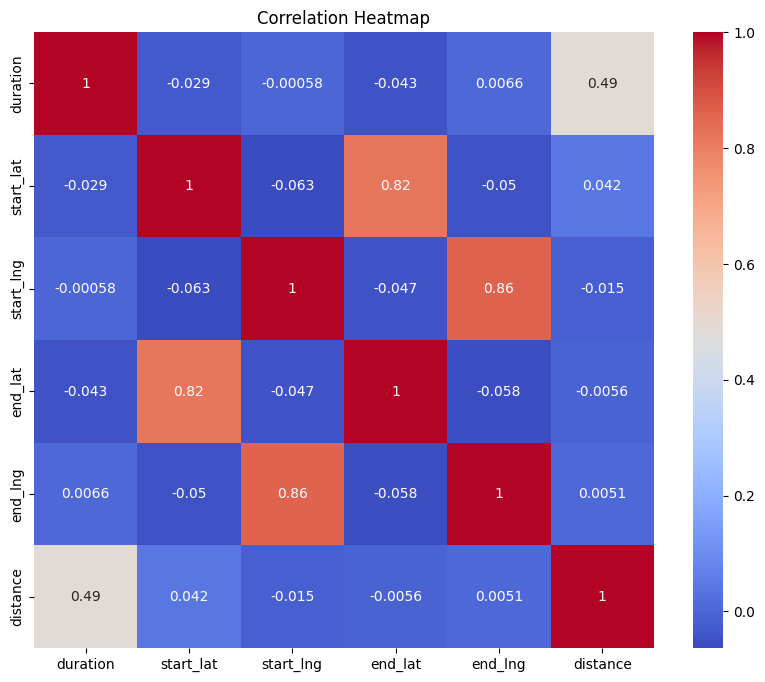

In [34]:
#Correlation Heat map for numerical data
plt.figure(figsize=(10, 8))
sns.heatmap(df[['duration', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'distance']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Observations:**A correlation heatmap displays the associations among several numerical variables, including duration, start and end latitude (lat), start and end longitude (lng), and distance.

**Notable Findings:**

There exists a moderate positive correlation (0.49) between the duration and distance of trips, suggesting that longer trips tend to cover a greater distance. However, it is important to note that this correlation is not definitive.

The correlation coefficients between the start and end latitudes and longitudes are approximately 0.82 and 0.86, respectively. This observation implies that journeys frequently commence and conclude within comparable geographical regions, so indicating a tendency towards local travel.

In general, the correlations between latitude and longitude with duration and distance are weak, indicating that trip times and distances are not significantly affected by starting and ending coordinates alone.

  

This heatmap facilitates the identification of correlations between trip characteristics, revealing that although trip length and distance are statistically significant, geographical factors such as coordinates have a relatively restricted impact on ride duration or distance.



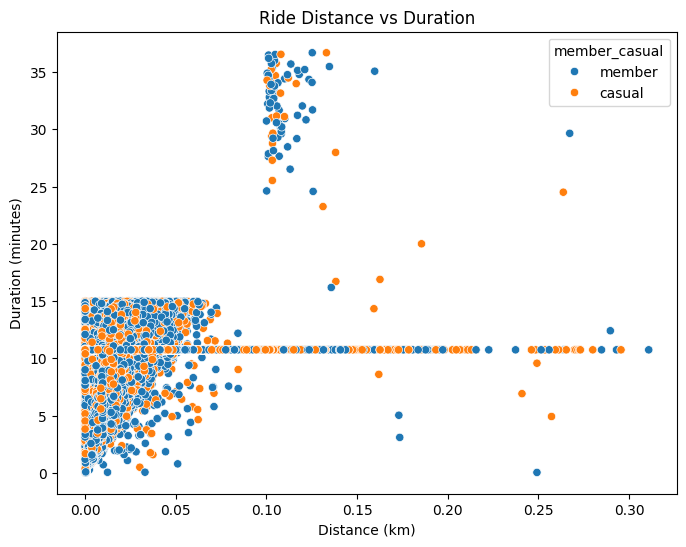

In [36]:
#scatterplot for Ride Distance vs Duration
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='distance', y='duration', hue='member_casual')
plt.title('Ride Distance vs Duration')
plt.xlabel('Distance (km)')
plt.ylabel('Duration (minutes)')
plt.show()


**Observations:**The scatter plot illustrates the correlation between the measurement of ride distance (in kilometers) and ride duration (in minutes) for both members and casual users. Every point corresponds to a unique ride, with blue points denoting members and orange points representing casual users.

**Notable Findings:**

Short distances, ranging from 0 to 0.05 km, constitute the bulk of the rides. These rides typically last between 5 to 15 minutes for both members and casual users.

- There exists a group of rides that have a duration of approximately 35 minutes, although covering rather brief distances. These may indicate journeys in which the bicycle remained stationary for a portion of the time, perhaps as a result of deliberate stops or breaks.

- Rides of greater length, ranging from 0.1 to 0.3 km, exhibit greater variability in duration, especially among casual users. These findings suggest that casual users may require more time to cover the same distance as members, maybe because they are not familiar with the routes or usage patterns.



Overall, the plot indicates that the majority of rides are brief, and although ride durations are comparable for both user groups over shorter distances, casual users display greater variation over longer distances. This observation has potential utility in the areas of service optimization and comprehension of user behavior.



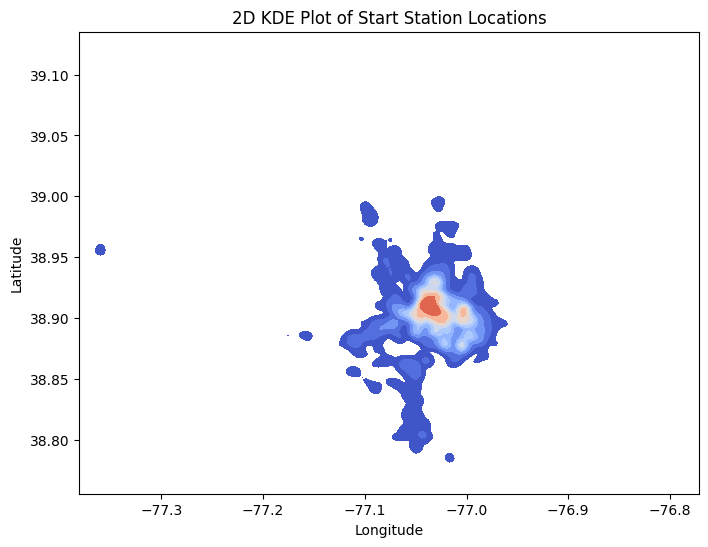

In [37]:
#2D KDE Plot of Start Station Locations
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['start_lng'], y=df['start_lat'], fill=True, cmap="coolwarm")
plt.title('2D KDE Plot of Start Station Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Observations:** This 2D Kernel Density Estimate (KDE) plot illustrates the density of start station locations according to their latitude and longitude coordinates. The graph provides a visual representation of the areas with the highest concentration of bike-sharing stations.

**Notable Findings:**

The central regions of the plot, characterized by red and orange areas, represent the most concentrated start stations, implying a central hub where the majority of bicycle activity originates. These locations are indicative of densely populated metropolitan areas characterized by a significant need for bike-sharing services.

The blue regions surrounding the center indicate geographic areas characterized by a lower density of stations. These areas may indicate the periphery of the service region or less populated sections of the city.

 The graph clearly illustrates that bike-sharing stations are geographically concentrated in a relatively small region, with a few outliers indicating stations located farther away from the central cluster.

<ipython-input-45-9a18b4f687c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='rideable_type', y='duration', palette=custom_palette)


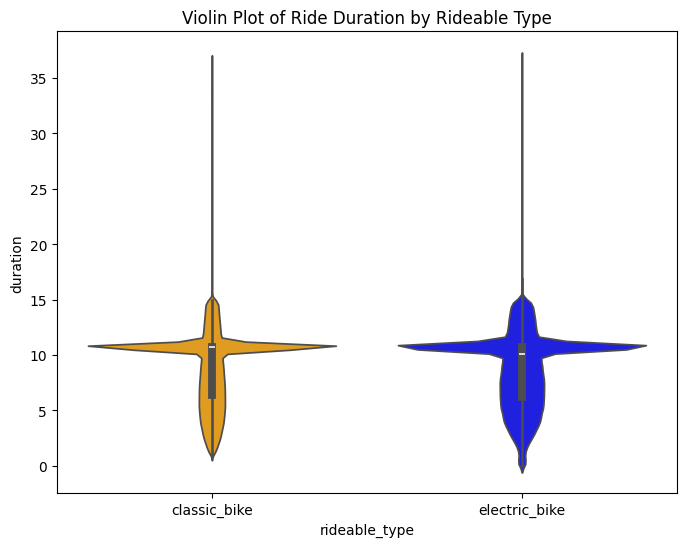

In [45]:
#Violin Plot of Ride Duration by Rideable Type
custom_palette = ['orange', 'blue']

# Create the violin plots
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='rideable_type', y='duration', palette=custom_palette)
plt.title('Violin Plot of Ride Duration by Rideable Type')
plt.show()



**observation:** The violin graph above illustrates the distribution of ride duration as a function of rideable type, namely between classic bikes and electric bikes. The violin plot synthesizes a box plot and a kernel density estimate to provide insights into the dispersion and distribution of ride durations.

**Notable Findings:**

Both traditional bicycles and electric bicycles have a comparable median ride duration of approximately 10 minutes, as shown by the white dot.

The distribution of ride durations for both bike types indicates that the majority of rides are concentrated around this median duration. However, electric bikes exhibit a somewhat more varied range of ride durations.

Traditional bicycles have a more elongated upper tail, resulting in some rides lasting over 35 minutes, a feature that is less noticeable in electric bicycles.

- Both bike types exhibit lower density near the lower and upper extremes, suggesting that far shorter or longer rides are less common.

The information presented in this graph indicates that the ride durations of the two bike types are generally comparable, with the majority of trips lasting approximately 10 minutes. Nevertheless, the somewhat wider range for traditional bicycles suggests a greater degree of diversity in their usage as compared to electric bikes.

